In [1]:
# give access to importing dwarfz
import os, sys
dwarfz_package_dir = os.getcwd().split("dwarfz")[0]
if dwarfz_package_dir not in sys.path:
    sys.path.insert(0, dwarfz_package_dir)

import dwarfz
    
# back to regular import statements

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as patches

import seaborn as sns
sns.set(context="poster", style="ticks", font_scale=1.4)

import numpy as np
import pandas as pd

from scipy import interpolate

import astropy
from astropy import units as u

# COSMOS Data

In [2]:
COSMOS_filename = os.path.join(dwarfz.data_dir_default, "COSMOS_reference.sqlite")
COSMOS = dwarfz.datasets.COSMOS(COSMOS_filename)

In [3]:
COSMOS.df.head()

,alpha,delta,flag_Capak,flag_UVISTA,flag_deep,flag_shallow,photo_z,classification,mass_med,mass_med_min68,mass_med_max68,ra,dec
id,,,,,,,,,,,,,
216439,149.697606,1.616639,0,0,0,0.0,0.0386,1,7.74447,7.61479,8.19060,149.697606,1.616639
218604,149.749393,1.618068,0,0,0,0.0,0.3797,0,11.07610,11.00020,11.12550,149.749393,1.618068
219020,150.125093,1.616900,0,0,0,0.0,0.1600,1,10.90000,10.86600,10.93410,150.125093,1.616900
219656,150.388349,1.614538,0,0,0,0.0,2.3343,1,8.99275,8.82478,9.12685,150.388349,1.614538
219657,150.383607,1.614532,0,0,0,0.0,1.3916,1,8.51774,7.95630,9.01445,150.383607,1.614532


In [4]:
COSMOS.df.describe()

,alpha,delta,flag_Capak,flag_UVISTA,flag_deep,flag_shallow,photo_z,classification,mass_med,mass_med_min68,mass_med_max68,ra,dec
count,518331.000000,518331.000000,518331.0,518331.0,518331.000000,518331.000000,518331.000000,518331.000000,518331.000000,518331.000000,518331.000000,518331.000000,518331.000000
mean,150.072394,2.232306,0.0,0.0,0.356195,0.325722,1.501246,0.947572,8.932841,8.778190,9.063062,150.072394,2.232306
std,0.381040,0.336753,0.0,0.0,0.478874,0.468645,1.056322,0.222889,0.924280,1.247627,1.204603,0.381040,0.336753
min,149.411366,1.614532,0.0,0.0,0.000000,0.000000,0.005000,0.000000,4.064430,-99.000000,-99.000000,149.411366,1.614532
25%,149.750004,1.954606,0.0,0.0,0.000000,0.000000,0.698100,1.000000,8.324890,8.130915,8.494390,149.750004,1.954606
50%,150.073257,2.228252,0.0,0.0,0.000000,0.000000,1.225400,1.000000,8.952890,8.791550,9.091950,150.073257,2.228252
75%,150.388587,2.523300,0.0,0.0,1.000000,1.000000,2.073100,1.000000,9.548460,9.422860,9.655005,150.388587,2.523300
max,150.786592,2.814121,0.0,0.0,1.000000,1.000000,5.994900,1.000000,12.316700,12.254600,13.066000,150.786592,2.814121


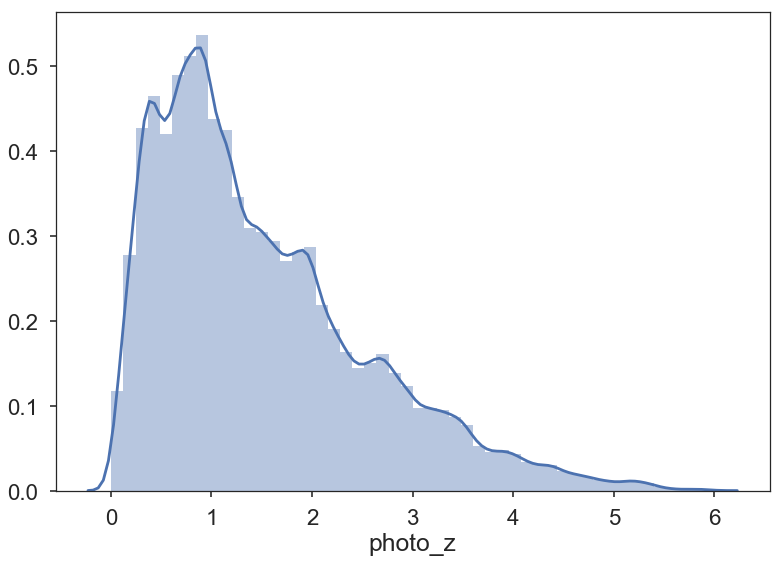

In [5]:
sns.distplot(COSMOS.df.photo_z)

In [6]:
downsample_factor = 10
mask_COSMOS_downsample = (COSMOS.df.index % downsample_factor == 0)

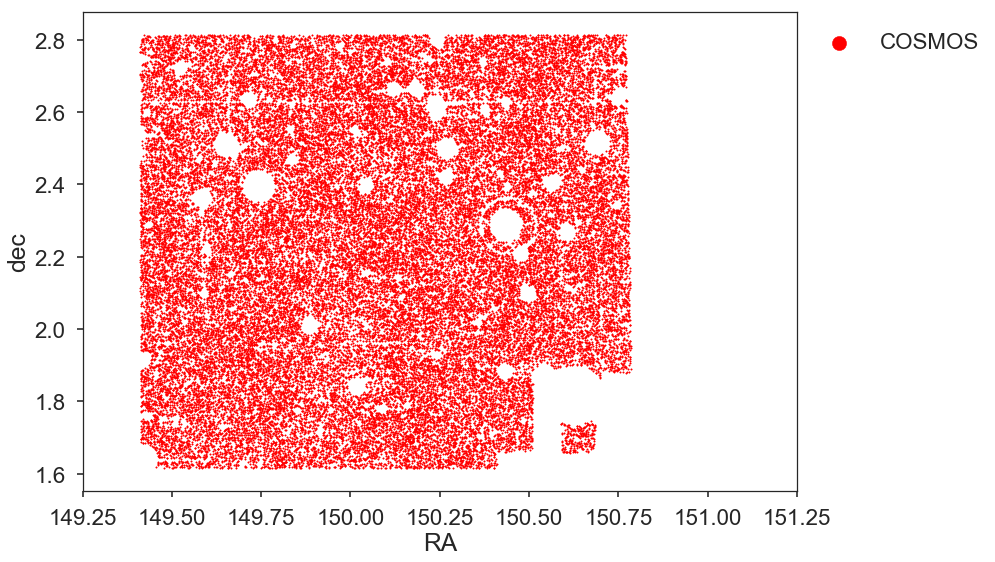

In [7]:
plt.scatter(COSMOS.df.ra[mask_COSMOS_downsample], 
            COSMOS.df.dec[mask_COSMOS_downsample],
            label=COSMOS.label, color="r", s=2,
           )

plt.xlabel("RA")
plt.ylabel("dec")

plt.xlim(149.25, 151.25)

plt.legend(loc="upper left", bbox_to_anchor=(1, 1), 
          markerscale=10)


# HSC Data

This won't be included in the git repo by default. See `get_data.ipynb`.

In [8]:
HSC_filename = os.path.join(dwarfz.data_dir_default, "HSC_COSMOS_median_forced.sqlite3")
HSC = dwarfz.datasets.HSC(HSC_filename)

In [9]:
HSC.df.head()

,ra,dec,detect_is_patch_inner,detect_is_tract_inner,detect_is_primary,gcmodel_flux,gcmodel_flux_err,gcmodel_flux_flags,gcmodel_mag,rcmodel_flux,...,icmodel_flux_flags,icmodel_mag,zcmodel_flux,zcmodel_flux_err,zcmodel_flux_flags,zcmodel_mag,ycmodel_flux,ycmodel_flux_err,ycmodel_flux_flags,ycmodel_mag
object_id,,,,,,,,,,,,,,,,,,,,,
43158034708430853,150.903878,1.697209,True,True,True,NaN,NaN,True,NaN,NaN,...,True,NaN,NaN,NaN,True,NaN,NaN,NaN,True,NaN
43158034708430859,150.902865,1.700115,True,True,True,1.589821e-30,3.225965e-31,False,25.896629,NaN,...,False,24.963961,-9.020090e-31,5.404378e-31,False,NaN,1.464685e-30,1.823984e-30,False,25.98564
43158034708430861,150.906167,1.700661,True,True,True,NaN,NaN,True,NaN,NaN,...,True,NaN,NaN,NaN,True,NaN,NaN,NaN,True,NaN
43158034708430866,150.909037,1.705647,True,True,True,NaN,NaN,True,NaN,NaN,...,True,NaN,NaN,NaN,True,NaN,NaN,NaN,True,NaN
43158034708430870,150.909058,1.707563,True,True,True,NaN,NaN,True,NaN,NaN,...,True,NaN,NaN,NaN,True,NaN,NaN,NaN,True,NaN


In [10]:
HSC.df.describe()

,ra,dec,gcmodel_flux,gcmodel_flux_err,gcmodel_mag,rcmodel_flux,rcmodel_flux_err,rcmodel_mag,icmodel_flux,icmodel_flux_err,icmodel_mag,zcmodel_flux,zcmodel_flux_err,zcmodel_mag,ycmodel_flux,ycmodel_flux_err,ycmodel_mag
count,928534.000000,928534.000000,7.690350e+05,7.551790e+05,7.396050e+05,8.027340e+05,7.961300e+05,7.896650e+05,8.275200e+05,8.166680e+05,8.095610e+05,8.283700e+05,8.167040e+05,8.041950e+05,8.195020e+05,8.005810e+05,7.400920e+05
mean,150.203410,2.228374,6.519398e-30,2.609099e-31,inf,1.156106e-29,2.450737e-31,inf,2.041056e-29,4.497654e-31,inf,2.687119e-29,6.071187e-31,inf,3.272011e-29,1.831965e-30,inf
std,0.390018,0.393860,6.638197e-29,1.358594e-31,NaN,1.158724e-28,5.136422e-30,NaN,1.869028e-28,2.747879e-31,NaN,2.539900e-28,4.223019e-31,NaN,3.122411e-28,1.111928e-30,NaN
min,149.504135,1.487604,-1.387765e-29,1.106159e-31,1.583224e+01,-1.065718e-26,7.876289e-32,1.522354e+01,-1.003394e-28,2.055935e-31,1.486172e+01,-9.183730e-29,3.004014e-31,1.452095e+01,-1.932652e-28,9.309609e-31,1.435206e+01
25%,149.878660,1.904190,6.320586e-31,2.033603e-31,2.512712e+01,1.063674e-30,1.727344e-31,2.477960e+01,1.346148e-30,3.331775e-31,2.431791e+01,1.463098e-30,4.413547e-31,2.405960e+01,1.192934e-30,1.361729e-30,2.372802e+01
50%,150.200577,2.229233,1.418287e-30,2.402754e-31,2.596487e+01,1.958424e-30,2.184194e-31,2.564796e+01,2.832784e-30,4.045115e-31,2.523776e+01,3.291403e-30,5.408081e-31,2.505931e+01,4.051469e-30,1.639472e-30,2.470167e+01
75%,150.516367,2.552068,3.103480e-30,2.849902e-31,2.675559e+01,4.369804e-30,2.660773e-31,2.629728e+01,6.630696e-30,4.948445e-31,2.600889e+01,8.306420e-30,6.549200e-31,2.588803e+01,1.039705e-29,1.973811e-30,2.566023e+01
max,150.991734,2.975204,1.686952e-26,1.707486e-29,inf,2.955184e-26,4.581177e-27,inf,4.123954e-26,2.487757e-29,inf,5.644434e-26,6.039158e-29,inf,6.594440e-26,1.004648e-28,inf


In [11]:
downsample_factor = 10
mask_HSC_downsample = (HSC.df.index % downsample_factor == 0)

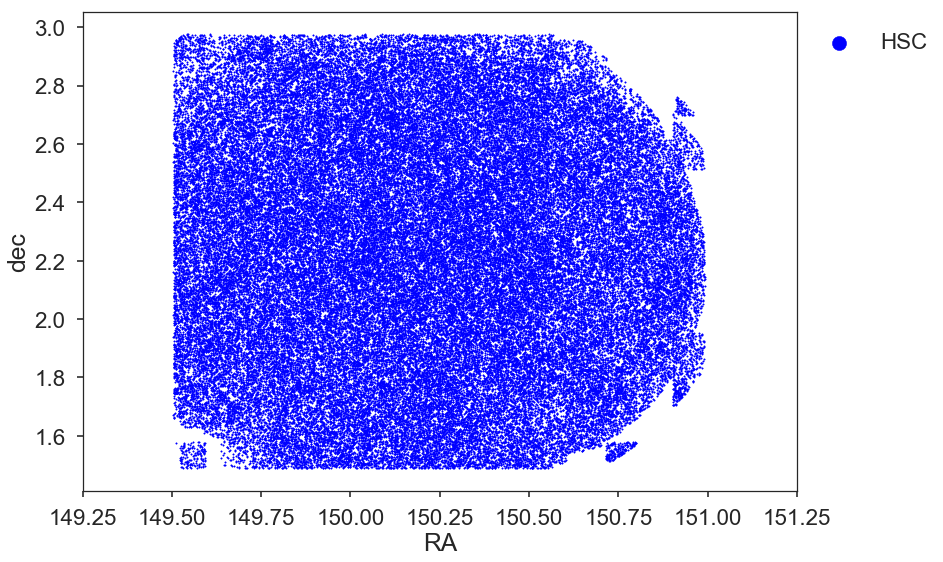

In [12]:
plt.scatter(HSC.df.ra[mask_HSC_downsample], 
            HSC.df.dec[mask_HSC_downsample],
            label=HSC.label, color="b", s=2,
           )

plt.xlabel("RA")
plt.ylabel("dec")

plt.xlim(149.25, 151.25)

plt.legend(loc="upper left", bbox_to_anchor=(1, 1), 
          markerscale=10)


# Plot both datasets

In [13]:
downsample_factor_COSMOS = 30
mask_COSMOS_downsample = (COSMOS.df.index % downsample_factor_COSMOS == 0)

downsample_factor_HSC = 30*2
mask_HSC_downsample = (HSC.df.index % downsample_factor_HSC == 0)

print("Number of COSMOS galaxies to plot: ", mask_COSMOS_downsample.sum())
print("Number of HSC galaxies to plot:    ", mask_HSC_downsample.sum())

Number of COSMOS galaxies to plot:  17270
Number of HSC galaxies to plot:     15443


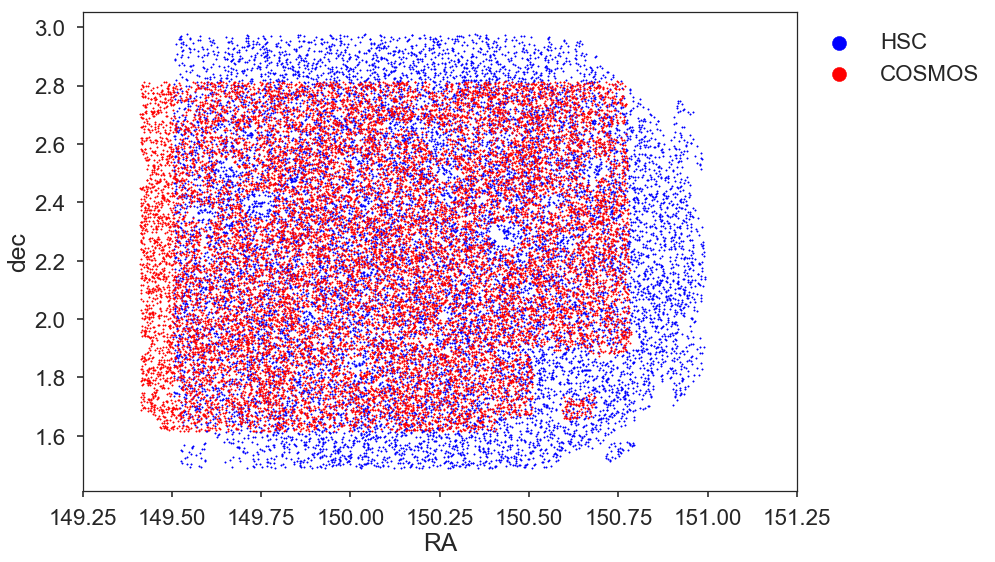

In [14]:
plt.scatter(HSC.df.ra[mask_HSC_downsample], 
            HSC.df.dec[mask_HSC_downsample],
            label=HSC.label, color="b", s=2,
           )


plt.scatter(COSMOS.df.ra[mask_COSMOS_downsample], 
            COSMOS.df.dec[mask_COSMOS_downsample],
            label =COSMOS.label, color="r", s=2,
           )


plt.xlabel("RA")
plt.ylabel("dec")

plt.xlim(149.25, 151.25)

plt.legend(loc="upper left", bbox_to_anchor=(1, 1), 
          markerscale=10)


# Start matching

In [15]:
downsample_factor_COSMOS = 1
mask_COSMOS_downsample = (COSMOS.df.index % downsample_factor_COSMOS == 0)

downsample_factor_HSC = 1
mask_HSC_downsample = (HSC.df.index % downsample_factor_HSC == 0)

In [16]:
matches = dwarfz.matching.Matches(COSMOS.df[mask_COSMOS_downsample],
                                  HSC.df[mask_HSC_downsample],
                                 )

In [17]:
matches_filename = os.path.join(dwarfz.data_dir_default, "matches.sqlite3")
if not os.path.exists(matches_filename):
    matches.save_to_filename(matches_filename)

# Evaluate matches

In [18]:
print("threshold (error) : {:>5.2f}".format(matches.threshold_error))
print("threshold (match) : {:>5.2f}".format(matches.threshold_match))

threshold (error) : 15.00 arcsec
threshold (match) :  1.00 arcsec


In [19]:
print("overall completeness : {:.2f} %".format(100*np.mean(matches.df.match[~matches.df.error])))

overall completeness : 83.92 %


In [20]:
print("min separation: {:.4f} [arcsec]".format(min(matches.df.sep)))
print("max separation: {:.4f} [arcsec]".format(max(matches.df.sep)))

min separation: 0.0002 [arcsec]
max separation: 335.4579 [arcsec]


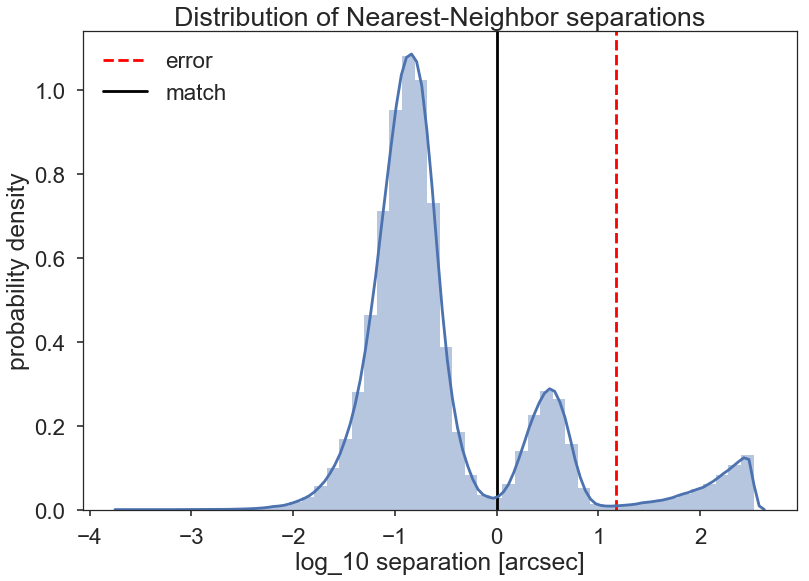

In [21]:
plt.axvline(np.log10(matches.threshold_error.to(u.arcsec).value),   
            linestyle="dashed", color="r", label="error")
plt.axvline(np.log10(matches.threshold_match.to(u.arcsec).value), 
            linestyle="solid",  color="k", label="match")
plt.legend(loc="upper left")

sns.distplot(np.log10(matches.df.sep))
plt.xlabel("log_10 separation [arcsec]")
plt.ylabel("probability density")

plt.title("Distribution of Nearest-Neighbor separations")

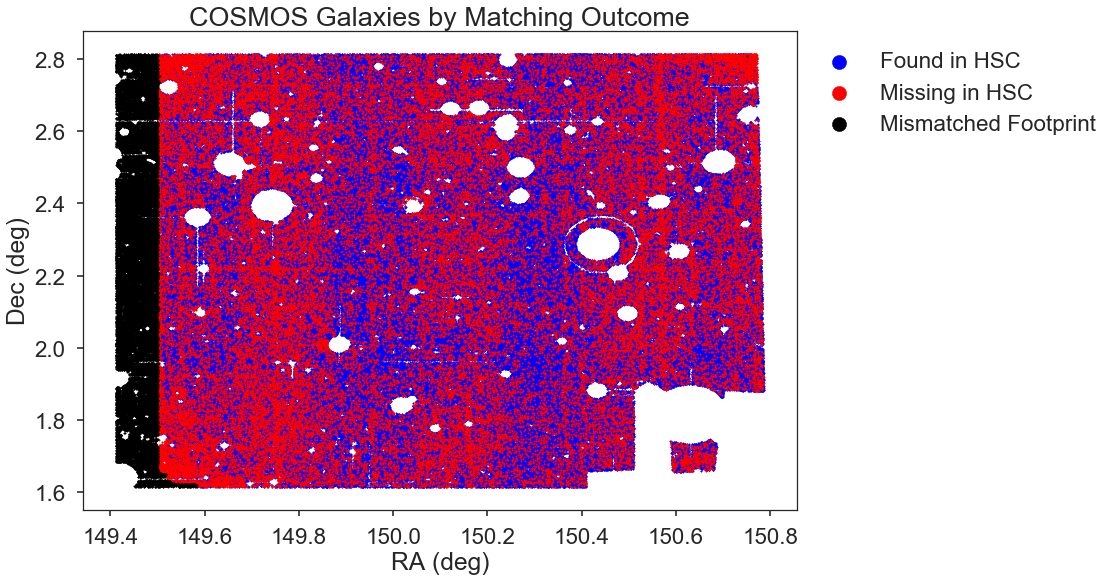

In [22]:
plt.scatter(COSMOS.df.loc[matches.df.index[matches.df.match]].ra,
            COSMOS.df.loc[matches.df.index[matches.df.match]].dec,
            color="b", s=2,
            label="Found in HSC",
           )


plt.scatter(COSMOS.df.loc[matches.df.index[~matches.df.match & ~matches.df.error]].ra,
            COSMOS.df.loc[matches.df.index[~matches.df.match & ~matches.df.error]].dec,
            color="r", s=2,
            label="Missing in HSC",
           )


plt.scatter(COSMOS.df.loc[matches.df.index[matches.df.error]].ra,
            COSMOS.df.loc[matches.df.index[matches.df.error]].dec,
            color="k", s=2,
            label="Mismatched Footprint",
           )


plt.xlabel("RA (deg)")
plt.ylabel("Dec (deg)")

plt.legend(loc="upper left", bbox_to_anchor=(1,1), markerscale=10)
plt.title("COSMOS Galaxies by Matching Outcome")

# Make the 2d completeness plot (overall)

## First, implement the quoted completeness for COSMOS

In [23]:
def get_COSMOS_completeness():
    """ Gets interpolators for the COSMOS completeness limits as a function of redshift

    I *think* this is the 50% completeness threshold for each type of galaxy
    ("all", "passive", "active" [star-forming]) in terms of the stellar mass.
    (I.e. below this mass, cosmos isn't confident that it's complete)
    
    
    Inputs
    ------
        None
        
    Outputs
    -------
        dict of scipy.interpolate.interpolate.interp1d objects
            - dictionary keys are "all", "passive" and "active", 
              mapping to respective interpolators
            - Interpolators take in redshift, and return the 
              stellar mass completeness limit in log M_solar units
    
    
    Notes
    -----
    This is taken from Alexie's `ms_limit.pro` file. I *think* these are 
    completeness limits for respective galaxy types, not classification cuts
    for active vs. passive.
    
    """

    redshifts = [0.17, 0.24, 0.32, 0.37, 0.43, 0.5]

    # ALL GALAXIES
    log_masses = [ 7.53,  7.93,  8.22,  8.38,  8.52,  8.66]
    interp_all_galaxies = interpolate.interp1d(redshifts, log_masses)
    
    # PASSIVE GALAXIES
    log_masses = [ 7.68,  8.07,  8.38,  8.59,  8.74,  8.88]
    interp_passive_galaxies = interpolate.interp1d(redshifts, log_masses)
    
    # ACTIVE GALAXIES
    log_masses = [ 7.51,  7.91,  8.17,  8.30,  8.43,  8.55]
    interp_active_galaxies = interpolate.interp1d(redshifts, log_masses)
    
    
    return {
        "all"     : interp_all_galaxies,
        "passive" : interp_passive_galaxies,
        "active"  : interp_active_galaxies,
    }

COSMOS_completeness_limits = get_COSMOS_completeness()

## Now determine completeness for HSC

In [24]:
masses  = COSMOS.df.loc[matches.df.index[~matches.df.error]].mass_med
photo_z = COSMOS.df.loc[matches.df.index[~matches.df.error]].photo_z

matched = np.array(matches.df.match[~matches.df.error], dtype=float)


In [25]:
num_bins = 100
num_galaxies, x_edges, y_edges = np.histogram2d(photo_z, masses, bins=num_bins)
num_matches, _, _ = np.histogram2d(photo_z, masses, bins=[x_edges, y_edges], weights=matched)

num_matches  = num_matches.T
num_galaxies = num_galaxies.T

completeness = num_matches / num_galaxies

/Users/egentry/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in true_divide


In [26]:
completeness[np.isfinite(completeness)].min()

0.0

In [27]:
completeness[np.isfinite(completeness)].max()

1.0

In [28]:
xx, yy = np.meshgrid(x_edges[:-1], y_edges[:-1])
yy = 10**yy # get back into linear space for masses

#### Plot overall histogram of COSMOS Galaxies:


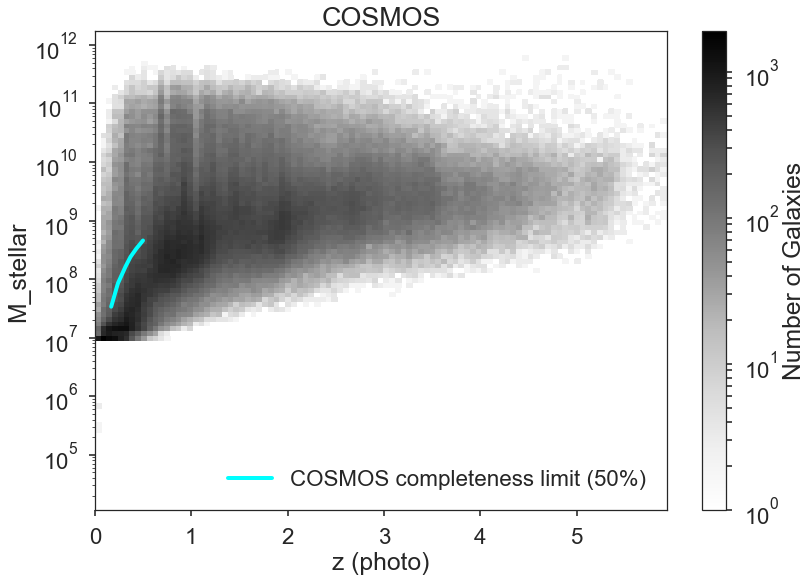

In [29]:
plt.pcolormesh(xx, yy, num_galaxies,
                 norm=colors.LogNorm(vmin=1, vmax=num_galaxies.max()),
#                cmap=plt.cm.viridis_r, 
              )
plt.colorbar(label="Number of Galaxies")
plt.xlabel("z (photo)")
plt.ylabel("M_stellar")

zs = np.linspace(COSMOS_completeness_limits["all"].x.min(), COSMOS_completeness_limits["all"].x.max())
plt.plot(zs, 10**COSMOS_completeness_limits["all"](zs), 
         color="cyan", linewidth=4,
         label="COSMOS completeness limit (50%)",
        )
plt.legend(loc="lower right")


plt.yscale("log")
plt.title("COSMOS")

#### Plot completeness of COSMOS galaxies in HSC
Red contours are linearly spaced contours of the COSMOS galaxy distribution

/Users/egentry/anaconda3/lib/python3.5/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


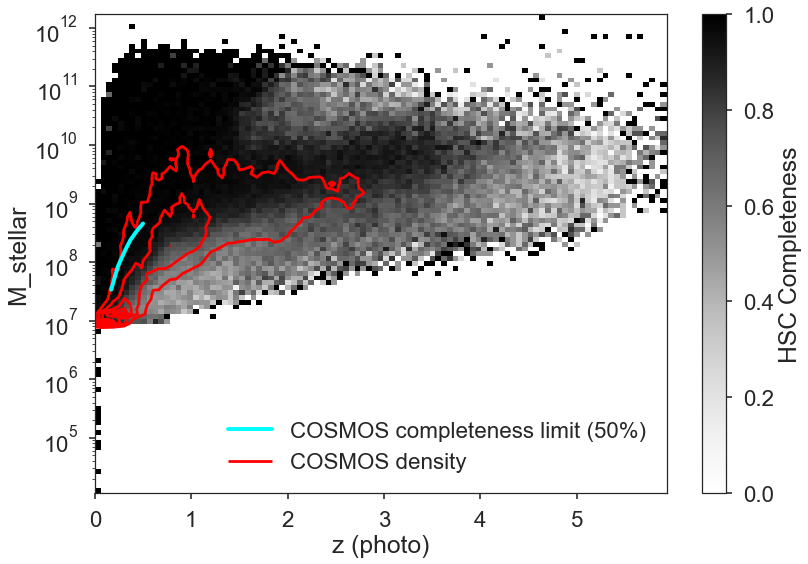

In [30]:
plt.pcolormesh(xx, yy, completeness,
               vmin=0, vmax=1, 
#                cmap=plt.cm.viridis_r, 
              )
plt.colorbar(label="{} Completeness".format(HSC.label))
plt.xlabel("z (photo)")
plt.ylabel("M_stellar")

contours = plt.contour(xx, yy, num_galaxies, colors="r",
#             norm=colors.LogNorm(vmin=100, vmax=num_galaxies.max()),
            label="{} density".format(COSMOS.label)
           )
contours.collections[0].set_label("COSMOS density")


zs = np.linspace(COSMOS_completeness_limits["all"].x.min(), COSMOS_completeness_limits["all"].x.max())
plt.plot(zs, 10**COSMOS_completeness_limits["all"](zs), 
         color="cyan", linewidth=4,
         label="COSMOS completeness limit (50%)",
        )

plt.legend(loc="lower right")

plt.yscale("log")

# Make the 2d completeness plot (low-$z$)
Recreate the same two plots as above, but now only look at the low redshift area

In [31]:
num_bins = 100
histogram_range = ((0, .5), (6.5, 12.5))
num_galaxies, x_edges, y_edges = np.histogram2d(photo_z, masses, 
                                                range=histogram_range, bins=num_bins)
num_matches, _, _ = np.histogram2d(photo_z, masses, bins=[x_edges, y_edges], weights=matched)

num_matches  = num_matches.T
num_galaxies = num_galaxies.T

completeness = num_matches / num_galaxies

/Users/egentry/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in true_divide


In [32]:
completeness[np.isfinite(completeness)].min()

0.0

In [33]:
completeness[np.isfinite(completeness)].max()

1.0

In [34]:
xx, yy = np.meshgrid(x_edges[:-1], y_edges[:-1])
yy = 10**yy # get back into linear space for masses

#### Plot overall histogram of COSMOS Galaxies:
The red box is the area that we will be trying to isolate in `HSC_COSMOS_cuts.ipynb`

In [35]:
def add_target_box(ax):
    ax.add_patch(
    patches.Rectangle(
        (0, 10**8),   # (x,y)
        0.15,          # width
        10**9,          # height
    fill=False, color="r", linewidth=6),)

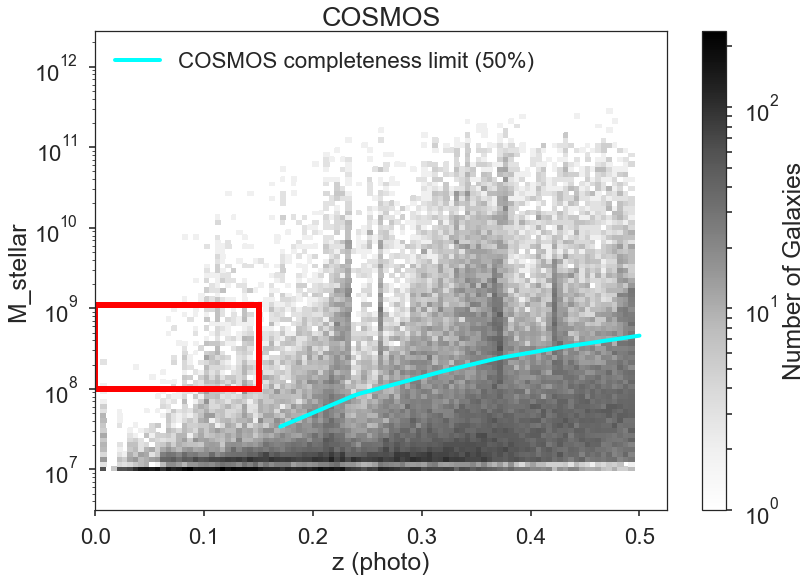

In [36]:
plt.pcolormesh(xx, yy, num_galaxies,
                 norm=colors.LogNorm(vmin=1, vmax=num_galaxies.max()),
#                cmap=plt.cm.viridis_r, 
              )
plt.colorbar(label="Number of Galaxies")
plt.xlabel("z (photo)")
plt.ylabel("M_stellar")

add_target_box(plt.gca())

zs = np.linspace(COSMOS_completeness_limits["all"].x.min(), COSMOS_completeness_limits["all"].x.max())
plt.plot(zs, 10**COSMOS_completeness_limits["all"](zs), 
         color="cyan", linewidth=4,
         label="COSMOS completeness limit (50%)",
        )

plt.yscale("log")
plt.legend(loc="upper left")
plt.title("COSMOS")

#### Plot completeness of COSMOS galaxies in HSC
The red box is the area that we will be trying to isolate in `HSC_COSMOS_cuts.ipynb`

/Users/egentry/anaconda3/lib/python3.5/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


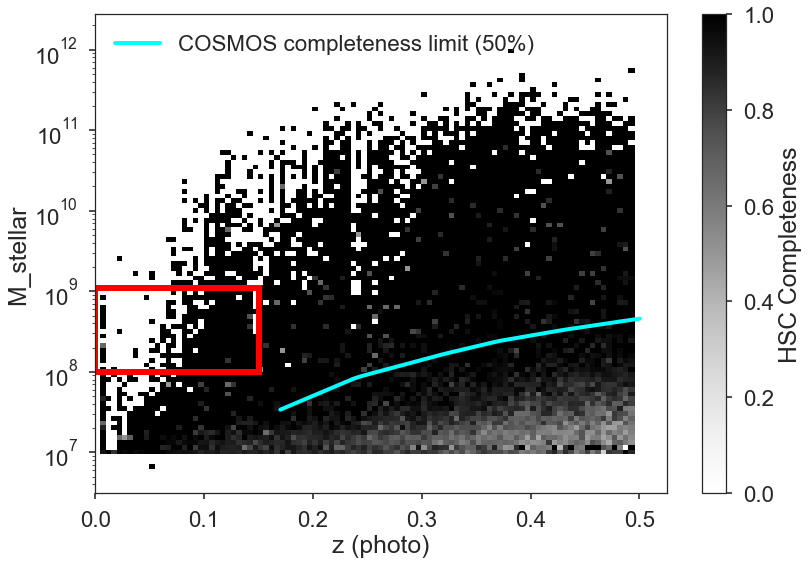

In [37]:
plt.pcolormesh(xx, yy, completeness,
               vmin=0, vmax=1, 
#                cmap=plt.cm.viridis_r, 
              )
plt.colorbar(label="{} Completeness".format(HSC.label))
plt.xlabel("z (photo)")
plt.ylabel("M_stellar")

add_target_box(plt.gca())

zs = np.linspace(COSMOS_completeness_limits["all"].x.min(), COSMOS_completeness_limits["all"].x.max())
plt.plot(zs, 10**COSMOS_completeness_limits["all"](zs), 
         color="cyan", linewidth=4,
         label="COSMOS completeness limit (50%)",
        )

plt.yscale("log")
plt.legend(loc="upper left")

# How many matches repeat?
How many times do we have 2, 3, ..., N COSMOS galaxies pointing to the same HSC galaxy? Note that we expect this value to typically be 0-1, not 2+ (since there are more HSC galaxies than COSMOS galaxies).

(To understand issues with HSC's object identification algorithms, you would want to do the opposite: start with HSC objects, then match the nearest COSMOS object -- if an object is artificially broken up, it would look like a large number of repeated matches.)

In [38]:
from collections import Counter

# first see which HSC galaxies have multiple COSMOS matches
# then get a histogram of the number of matches
counts = Counter(list(Counter(matches.df.catalog_2_ids[matches.df.match]).values()))
# add HSC galaxies which have no COSMOS object matched to them
number_of_HSC_objects_total = matches.catalog_2.index.size
number_of_HSC_objects_with_matches = np.sum(list(counts.values()))
counts[0] = number_of_HSC_objects_total - number_of_HSC_objects_with_matches
counts

Counter({0: 524085, 1: 403794, 2: 654, 3: 1})

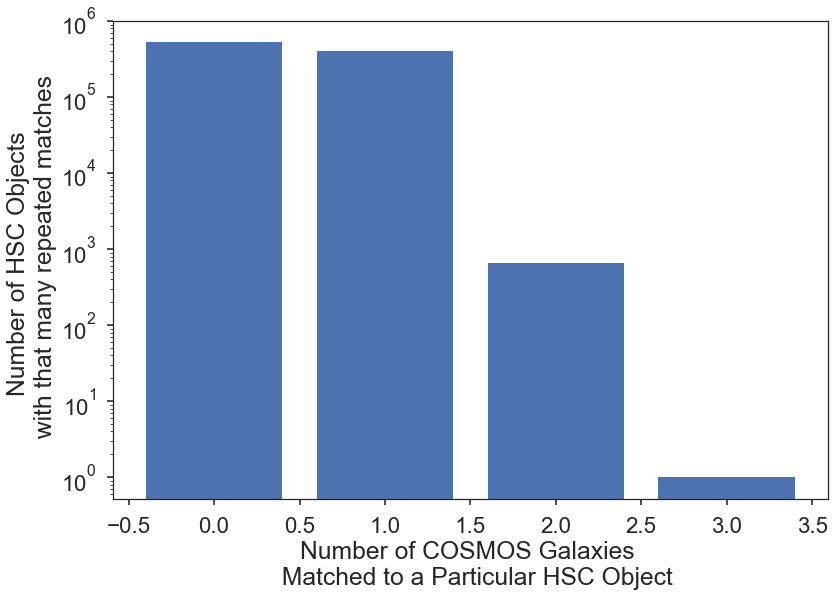

In [39]:
plt.bar(list(counts.keys()), list(counts.values()))
plt.yscale("log")
plt.xlabel("Number of COSMOS Galaxies \n  Matched to a Particular HSC Object")
plt.ylabel("Number of HSC Objects \n with that many repeated matches")